In [ ]:
%reset

In [1]:
%run 'Functions.ipynb'

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
from multiprocessing import Pool
from sklearn.model_selection import train_test_split

In [34]:
def train_net(data, labels, n_iter):
    
    data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.01)
    
    model = Sequential()

    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data_train.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)

    model.fit(data_train, labels_train, epochs=n_iter, batch_size=400, shuffle=True, verbose=0)

    proba = model.predict_proba(data_test, batch_size=100, verbose=0)
    predicted = proba.flatten()
    
    _, _, R, _, _ = stats.linregress(labels_test, predicted)
    
    return R

In [32]:
rValues = {}

def extractRs(chunk,n_iter):
    
    print chunk
    rValues[chunk] = []
    data = {}
    
    data_1, labels = read_data(chunk)
    data_2, labels = read_data_doubles(chunk)
    data_3, labels = read_data_triples(chunk)
    data_12 = np.append(data_1,data_2, axis=1)
    data_13 = np.append(data_1,data_3, axis=1)
    data_23 = np.append(data_2,data_3, axis=1)
    data_123 = np.append(data_12,data_3, axis=1)    

    rValues[chunk].append((train_net(data_1,labels,n_iter)))
    rValues[chunk].append((train_net(data_2,labels,n_iter)))
    rValues[chunk].append((train_net(data_3,labels,n_iter)))
    rValues[chunk].append((train_net(data_12,labels,n_iter)))
    rValues[chunk].append((train_net(data_13,labels,n_iter)))
    rValues[chunk].append((train_net(data_23,labels,n_iter)))
    rValues[chunk].append((train_net(data_123,labels,n_iter)))
    
    print rValues[chunk]

In [ ]:
for chunk in chunks:
    extractRs(chunk,500)

S1
[0.83976584710079483, 0.93634054576155357, 0.91160382906964499, 0.90011918112972222, 0.93980950255782825, 0.91462223944241294, 0.88910359451289733]
S2
[0.83307647372076576, 0.85675256356527263, 0.83345009613861254, 0.86121952601538476, 0.87801627120377046, 0.86473020888845542, 0.87064243791717111]
S3
[0.70504260547665043, 0.66863308058604465, 0.75166112559666298, 0.7336318553147505, 0.7690208158002394, 0.7610825642496365, 0.6987070291179559]


In [29]:
extractRs('S5')

S5
[0.66504721260715294, 0.78981975643940516, 0.60749924648957598, 0.55828158653116111, 0.62145195742388104, 0.6369883640681786, 0.51052040236995821]


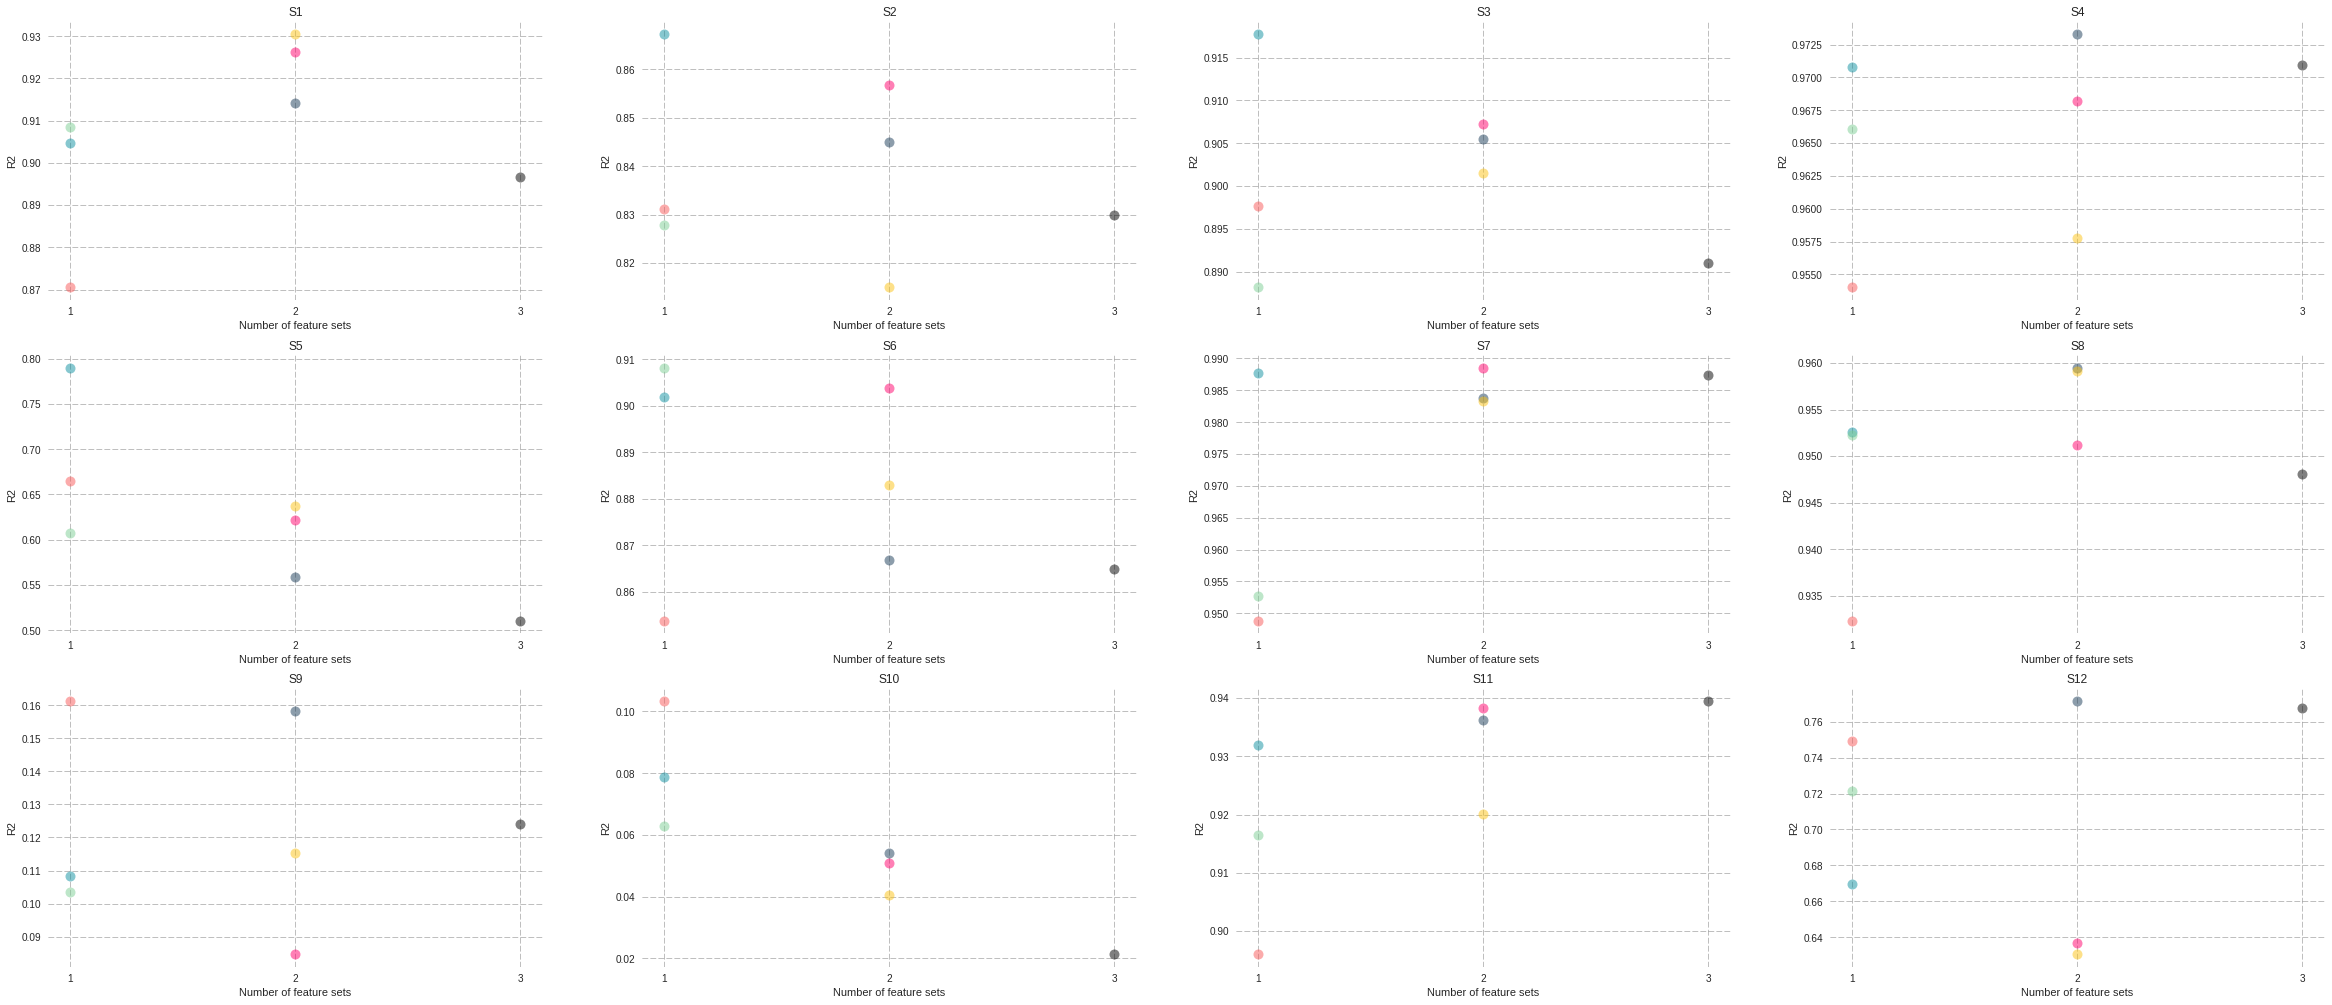

In [30]:
x = [1, 1, 1, 2, 2, 2, 3]
colors = ['#F95959','#0E91A1','#7DCE94','#1B3C59','#FF006C','#FCC314','k']

plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
    for i in range(len(x)):
        plt.plot(x[i], rValues[chunk][i], 'o', ms=10, alpha=0.5, color=colors[i])
    plt.xticks([n for n in [1,2,3]])
    plt.xlabel('Number of feature sets')
    plt.ylabel('R2')
#     plt.ylim([0.8,1]);
    count+=1